In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


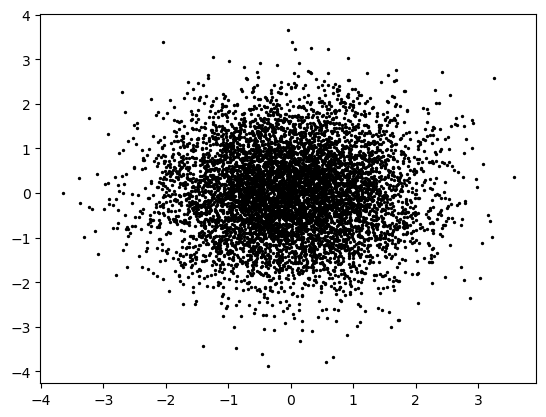

In [59]:
x = np.random.randn(7000)
y = np.random.randn(7000)
plt.scatter(x,y, color = "black", s = 2)


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imagesc` a `contour`.


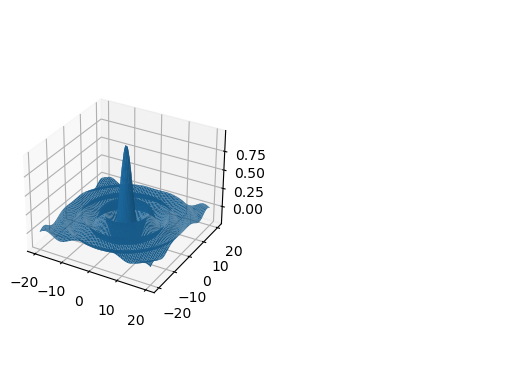

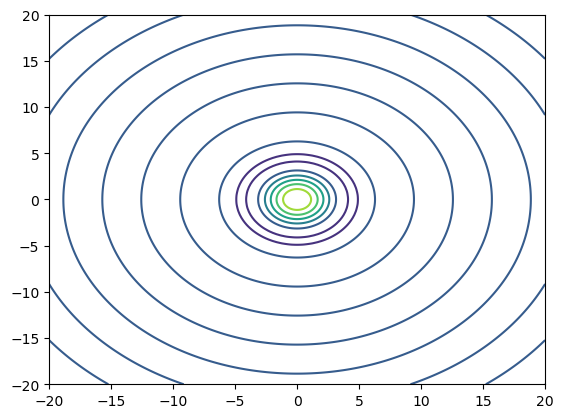

In [60]:
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib qt5
x = np.linspace(-20, 20, 300)
y = np.linspace(-20, 20, 300)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2+Y**2))/np.sqrt(X**2+Y**2)

fig, ax = plt.subplots()
ax.axis("off")
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

fig, ax = plt.subplots()
cnt = plt.contour(X, Y, Z)


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


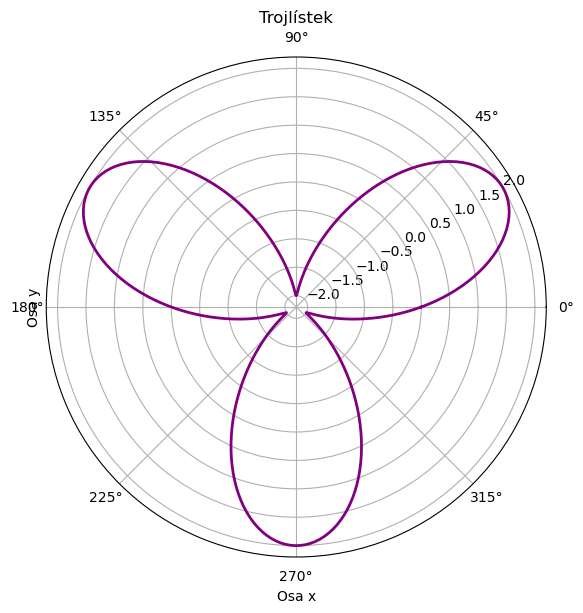

In [61]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0.0, 0.0, 1, 1], polar=True)
t = np.linspace(0, 2 * np.pi, 300)
y = np.array([2*np.sin(3*i) for i in t])
ax.plot(t, y, color='purple', lw=2);
ax.set_title("Trojlístek")
ax.set_xlabel("Osa x")
ax.set_ylabel("Osa y")
ax.set_rlabel_position(30)


4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


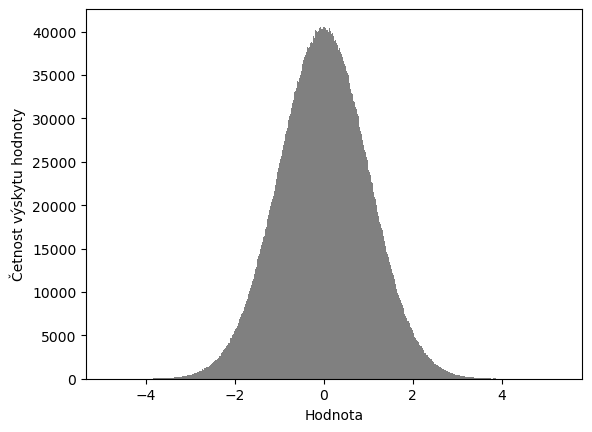

In [62]:
n = np.random.randn(5000000)
bins = 500
fig, axes = plt.subplots()
axes.hist(n, bins, color="gray")
axes.set_xlabel("Hodnota")
axes.set_ylabel("Četnost výskytu hodnoty");


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


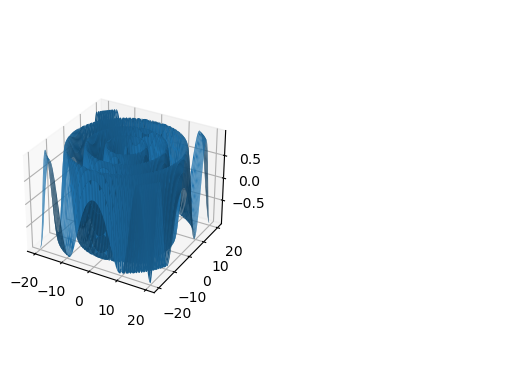

In [63]:
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib qt5
x = np.linspace(-20, 20, 300)
y = np.linspace(-20, 20, 300)
X, Y = np.meshgrid(x, y)
Z = np.cos(np.sqrt(X**2+Y**2))

fig, ax = plt.subplots()
ax.axis("off")
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# Domácí úkol
- Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral` a vykreslete spirálu a její sinus pomocí `imshow` a `contour`.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 

In [7]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [8]:
def integer_spiral_numpy(n, arr=[]):
    if n % 2 == 0:
        return -1
    if len(arr) == 0:
        arr = np.arange(1, n**2+1)
    else:
        arr = np.array(arr)
    sz = arr.size
    padds = [0,0,0,0] # [dolu, doleva, nahoru, doprava]
    advance = n
    mat = np.zeros((n,n))
    i = 0
    while np.count_nonzero(mat) != n**2-1:
        decision = i % 4
        section = arr[arr.size-advance:]
        arr = arr[:arr.size-advance]
        if decision == 0:
            # dolu
            mat[padds[2]:n-padds[0],n-padds[2]-1] = np.flip(section)
            padds[3] += 1
            padds[0] += 1
            advance -= 1
        elif decision == 1:
            # doleva
            mat[n-padds[0],padds[2]:n-padds[3]] = section
            padds[1] += 1

        elif decision == 2:
            # nahoru
            mat[padds[2]:n-padds[0], padds[1]-1] = section
            padds[2] += 1
            advance -= 1
        else:
            # decision 3 => doprava
            mat[padds[2]-1,padds[1]:n-padds[3]] = np.flip(section)
        i+=1

    mat[mat==0] = 1
    return mat

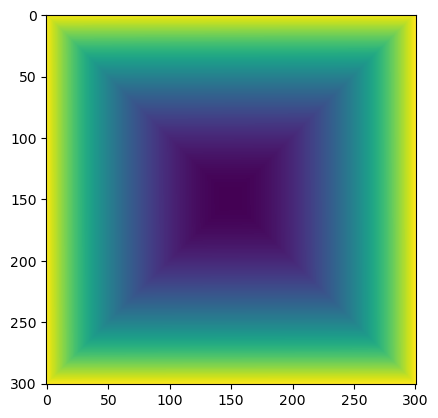

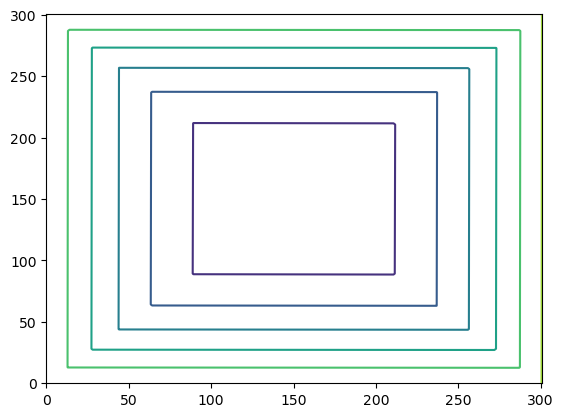

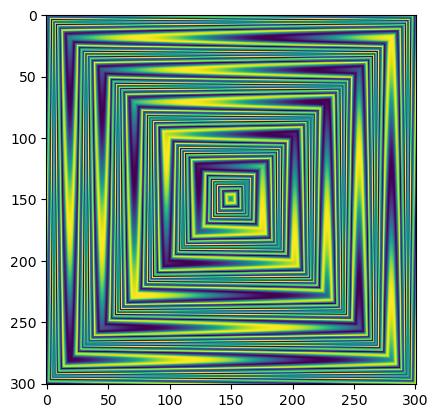

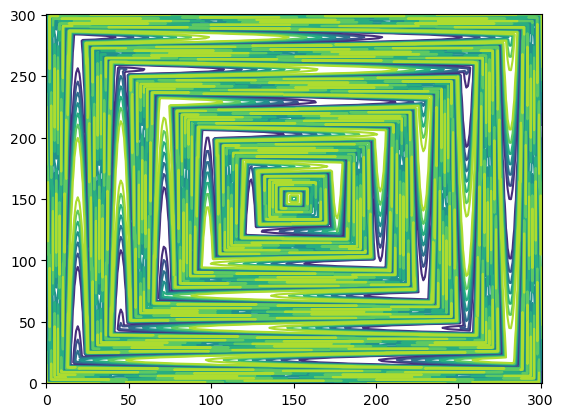

In [9]:
n = 301
A = integer_spiral_numpy(n)
plt.imshow(A)
plt.figure()
x = np.linspace(0, A.shape[0], A.shape[0])
y = np.linspace(0, A.shape[1], A.shape[1])
X, Y = np.meshgrid(x, y)
Z = A.copy()
plt.contour(X, Y, Z)

plt.figure()
A = np.sin(A*0.03)
plt.imshow(A)
plt.figure()
x = np.linspace(0, A.shape[0], A.shape[0])
y = np.linspace(0, A.shape[1], A.shape[1])
X, Y = np.meshgrid(x, y)
Z = A.copy()
plt.contour(X, Y, Z)

In [65]:
from time import time
import timeit
x = np.arange(start=11,stop=701, step=25)
times = np.empty((x.size,2))

for index,el in enumerate(x):
    if el % 2 != 0:
        pass
    else:
        el = el+1
    t1 = time()
    integer_spiral(el)
    t2 = time()
    integer_spiral_numpy(el)
    t3 = time()
    times[index,:] = np.array([t2-t1, t3-t2])


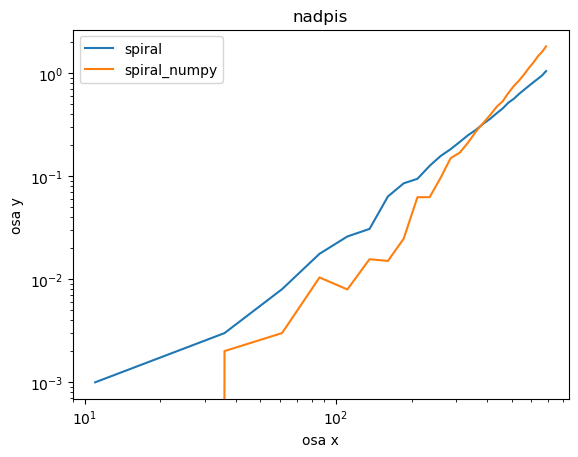

In [66]:
# v log-log grafu jsou funkce typu y=a*x^k zobrazeny jako primky,
# pricemz sklon primky odpovida exponentu k a prunik s osou y odpovida koeficientu a

# z grafu tedy vidime, ze nase funkce maji zhruba polynomialni slozitost

fig, ax = plt.subplots(1, 1) 

ax.plot(x, times[:,0], label = "spiral")
ax.plot(x, times[:,1], label = "spiral_numpy")
# ax.plot(x, times[:,0], x, times[:,1])
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend()
ax.set_xlabel("osa x")
ax.set_ylabel("osa y")
ax.set_title("nadpis");

# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.

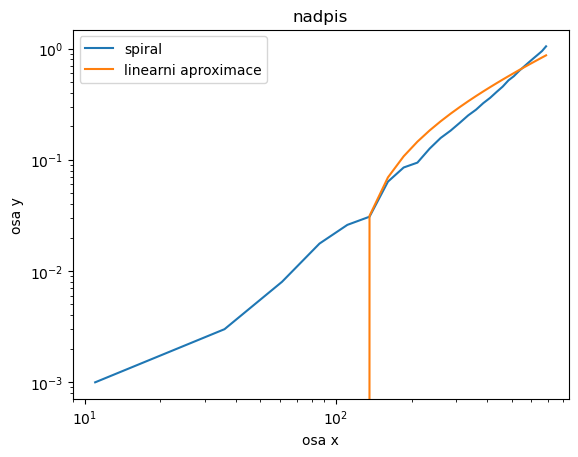

In [78]:
fig, ax = plt.subplots(1, 1) 
a,c = np.polyfit(x,times[:,0], 1)
f = lambda x : a*x+c


ax.plot(x, times[:,0], label = "spiral")
ax.plot(x, [f(i) for i in x], label="linearni aproximace")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend()
ax.set_xlabel("osa x")
ax.set_ylabel("osa y")
ax.set_title("nadpis");

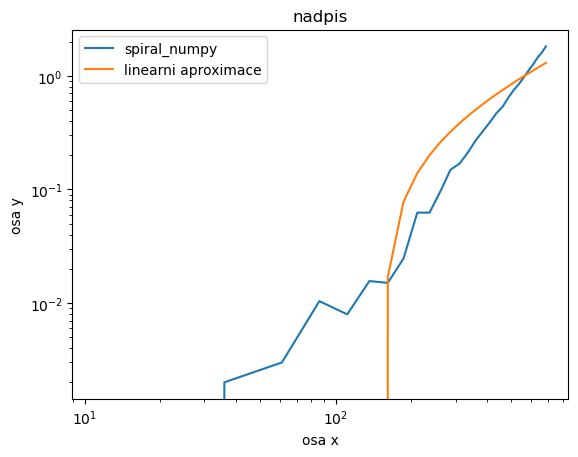

In [79]:
fig, ax = plt.subplots(1, 1) 
a,c = np.polyfit(x,times[:,1], 1)
f = lambda x : a*x+c


ax.plot(x, times[:,1], label = "spiral_numpy")
ax.plot(x, [f(i) for i in x],label="linearni aproximace")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend()
ax.set_xlabel("osa x")
ax.set_ylabel("osa y")
ax.set_title("nadpis");